In [9]:
import pandas as pd

name_list = ["/Users/cherylchung/Documents/GitHub/Emoryqtm151-2023/IC code/2023_IC_data/response_data.xlsx","/Users/cherylchung/Documents/GitHub/Emoryqtm151-2023/IC code/2023_IC_data/D1_data.xlsx","/Users/cherylchung/Documents/GitHub/Emoryqtm151-2023/IC code/2023_IC_data/Applicant_Scores_Data.xlsx"]
list_newnames = ["/Users/cherylchung/Documents/GitHub/Emoryqtm151-2023/IC code/2023_IC_data/response_data.csv","/Users/cherylchung/Documents/GitHub/Emoryqtm151-2023/IC code/2023_IC_data/D1_data.csv","/Users/cherylchung/Documents/GitHub/Emoryqtm151-2023/IC code/2023_IC_data/Applicant_Scores_Data.csv"]

for i in range(len(name_list)):
    dataset = pd.read_excel(name_list[i])
    dataset.to_csv(list_newnames[i], index=False)



In [ ]:
# Load the Excel file into a pandas DataFrame
df = pd.read_excel('your_file_name.xlsx')

# Extract the 'Name' column as a Series
name_col = df['Name']

# Use the str.extract method to extract the numbers from the 'Name' column
numbers = name_col.str.extract(r'(\d+)')

# Convert the resulting Series of numbers to a set to get the unique values
unique_numbers = set(numbers.squeeze())

# Print the unique numbers
print(unique_numbers)

In [ ]:
import pandas as pd

# Load the two Excel sheets into pandas dataframes
all_response = pd.read_excel('/Users/cherylchung/Documents/GitHub/Emoryqtm151-2023/IC code/2023_IC_data/response_data.xlsx')
decision_night = pd.read_excel('/Users/cherylchung/Documents/GitHub/Emoryqtm151-2023/IC code/2023_IC_data/D1_data.xlsx')

# Extract the list of names of students admitted on decision night
admitted_names = list(decision_night['Applicant Name'])

# Filter the rows in the all_applicants_df based on whether the name is in the admitted_names list
filtered_applicants = all_response[all_response['Name'].isin(admitted_names) & all_response['Name'].str.startswith(('2','3','4','5','6','7','8','9','10','24','32'))]

# Save the filtered dataframe to a new Excel sheet
filtered_applicants.to_excel('admitted_applicants.xlsx', index=False)
pd.read_excel('admitted_applicants.xlsx')

# <span style="color:darkblue"> Multiple linear regression model </span>

<font size = "5">

Do you want to contribute more (DV)

-Get along with others

-Belonging

-How easy is it to progress up

-Respect from others


In [26]:
import pandas as pd
import statsmodels.api as sm

data = pd.read_excel('/Users/cherylchung/Documents/GitHub/Emoryqtm151-2023/IC code/2023_IC_data/HC_Project_Responses_renamed.xlsx', sheet_name='Response')
X = data[['Get_along', 'Belonging', 'Easy', 'Respect']] 
y=data['contribute']

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             contribute   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     6.539
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           0.000616
Time:                        17:58:39   Log-Likelihood:                -69.326
No. Observations:                  36   AIC:                             148.7
Df Residuals:                      31   BIC:                             156.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1194      1.623      1.922      0.0

# <span style="color:darkblue"> Explaining the Multiple linear regression model </span>

<font size = "5">

Intrepretation:

-The R-squared value is 0.458, which means that the independent variables in the model explain 45.8% of the variance in the dependent variable.

-A positive coefficient indicates a positive relationship, while a negative coefficient indicates a negative relationship. In this case, the coefficient for Get_along is negative, while the coefficients for Belonging, Easy, and Respect are positive.

-The p-value for Respect is less than 0.05, indicating that this coefficient is statistically significant, and there is strong evidence that it is not equal to zero.

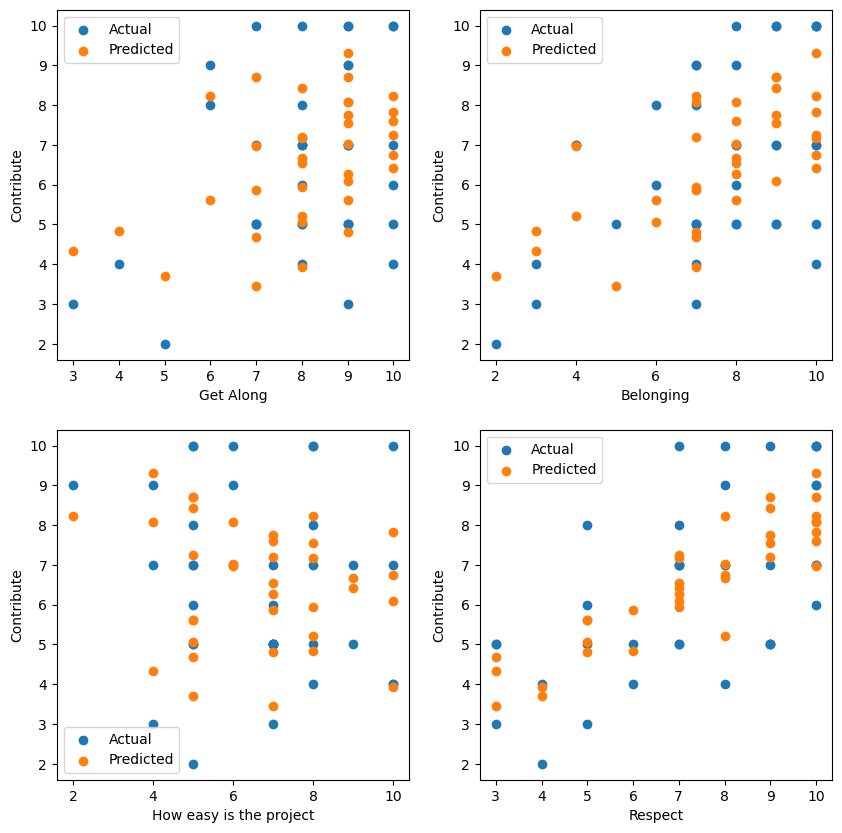

In [29]:
import matplotlib.pyplot as plt

data['y_pred'] = model.predict(sm.add_constant(X))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].scatter(X['Get_along'], y, label='Actual')
axs[0, 0].scatter(X['Get_along'], data['y_pred'], label='Predicted')
axs[0, 0].set_xlabel('Get Along')
axs[0, 0].set_ylabel('Contribute')
axs[0, 0].legend()

axs[0, 1].scatter(X['Belonging'], y, label='Actual')
axs[0, 1].scatter(X['Belonging'], data['y_pred'], label='Predicted')
axs[0, 1].set_xlabel('Belonging')
axs[0, 1].set_ylabel('Contribute')
axs[0, 1].legend()

axs[1, 0].scatter(X['Easy'], y, label='Actual')
axs[1, 0].scatter(X['Easy'], data['y_pred'], label='Predicted')
axs[1, 0].set_xlabel('How easy is the project')
axs[1, 0].set_ylabel('Contribute')
axs[1, 0].legend()

axs[1, 1].scatter(X['Respect'], y, label='Actual')
axs[1, 1].scatter(X['Respect'], data['y_pred'], label='Predicted')
axs[1, 1].set_xlabel('Respect')
axs[1, 1].set_ylabel('Contribute')
axs[1, 1].legend()

plt.show()


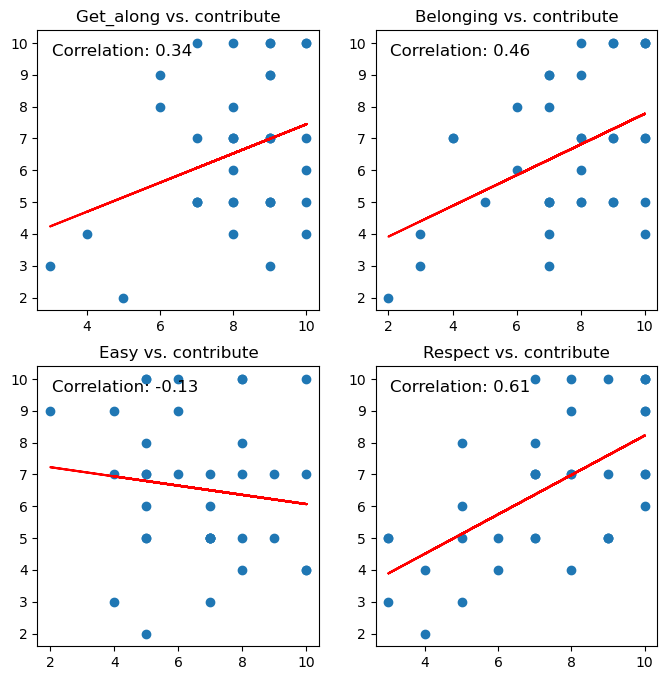

In [45]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for i, iv in enumerate(X.columns):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(X[iv], y)
    axs[row, col].set_title(f"{iv} vs. contribute")
    x = X[iv]
    slope, intercept = np.polyfit(x, y, 1)
    axs[row, col].plot(x, intercept + slope * x, color='red')
    corr_coef = np.corrcoef(x, y)[0, 1]
    axs[row, col].text(0.05, 0.95, f"Correlation: {corr_coef:.2f}", transform=axs[row, col].transAxes, fontsize=12, verticalalignment='top')

plt.show()

